In [253]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
#Input data
df1 = pd.read_csv("/content/gdrive/MyDrive/Data/saved_data (1).csv")

df1

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
0,2023-04-16,30310.3,30299.2,30545.3,30134.6,34.48,840992.0,4.788780e+13,1.866594e+06,495223185.0,...,2119.29,100.03,0.090465,0.52089,2015.6,25.438,9023.50,4137.64,33885.31,28493.47
1,2023-04-15,30299.6,30472.6,30586.5,30208.8,31.71,1045660.0,4.788780e+13,1.839875e+06,631025193.0,...,2090.59,96.66,0.088890,0.51930,2002.2,25.460,9023.50,4137.64,33885.31,28493.47
2,2023-04-14,30472.5,30387.4,30964.9,30026.0,98.38,1016042.0,4.788780e+13,1.759535e+06,559166432.0,...,2099.98,96.34,0.088707,0.52269,2002.2,25.460,9023.50,4137.64,33885.31,28493.47
3,2023-04-13,30387.4,29892.4,30524.1,29864.5,65.87,1009669.0,4.788780e+13,1.812113e+06,567094231.0,...,2012.11,94.19,0.087344,0.51244,2041.3,25.925,9058.50,4146.22,34030.34,28156.97
4,2023-04-12,29886.4,30209.8,30473.0,29679.5,78.69,1056542.0,4.788780e+13,1.933496e+06,635037442.0,...,1916.58,92.02,0.083398,0.50473,2010.9,25.458,8916.50,4091.95,33647.22,28082.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,2010-07-24,0.1,0.1,0.1,0.1,0.50,959.0,1.820000e+02,1.519540e+03,1148772.0,...,0.00,0.00,0.000000,0.00000,1187.8,18.101,7018.25,1102.66,10424.62,9430.96
4650,2010-07-23,0.1,0.1,0.1,0.1,2.40,655.0,1.820000e+02,5.309330e+02,412004.0,...,0.00,0.00,0.000000,0.00000,1187.8,18.101,7018.25,1102.66,10424.62,9430.96
4651,2010-07-22,0.1,0.1,0.1,0.1,2.16,594.0,1.820000e+02,5.724432e+02,403000.0,...,0.00,0.00,0.000000,0.00000,1195.6,18.120,7002.75,1093.67,10322.30,9220.88
4652,2010-07-21,0.1,0.1,0.1,0.1,0.58,784.0,1.820000e+02,6.038213e+02,499964.0,...,0.00,0.00,0.000000,0.00000,1191.8,17.803,0.00,1069.59,10120.53,9278.83


In [207]:
df2=df1[0:1000]
df = df2.iloc[::-1]
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
999,2020-07-21,9387.3,9162.3,9426.9,9155.1,458.99,927506.0,1.734590e+13,1292411.712,491378058.0,...,245.53,43.785,0.003300,0.19947,1843.9,21.557,6534.5,3257.30,26840.40,22884.22
998,2020-07-22,9513.7,9387.4,9523.1,9296.0,386.00,1017627.0,1.734590e+13,1260827.708,571307064.0,...,263.28,44.983,0.003289,0.20356,1865.1,23.144,6486.0,3276.02,27005.84,22751.61
997,2020-07-23,9599.6,9513.6,9646.5,9451.1,425.66,977856.0,1.734590e+13,1291887.757,543267007.0,...,275.34,44.939,0.003298,0.20851,1890.0,22.988,6544.5,3235.66,26652.33,22751.61
996,2020-07-24,9546.4,9599.2,9626.2,9480.5,359.16,1083981.0,1.734590e+13,1314932.379,643237571.0,...,279.33,44.100,0.003215,0.20401,1897.5,22.850,6415.0,3215.63,26469.89,22751.61
995,2020-07-25,9704.1,9546.7,9729.3,9536.2,306.29,972156.0,1.734590e+13,1366096.035,559366641.0,...,305.32,49.153,0.003252,0.21463,1897.5,22.850,6415.0,3215.63,26469.89,22751.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-04-12,29886.4,30209.8,30473.0,29679.5,78.69,1056542.0,4.788780e+13,1933495.919,635037442.0,...,1916.58,92.020,0.083398,0.50473,2010.9,25.458,8916.5,4091.95,33647.22,28082.70
3,2023-04-13,30387.4,29892.4,30524.1,29864.5,65.87,1009669.0,4.788780e+13,1812112.549,567094231.0,...,2012.11,94.190,0.087344,0.51244,2041.3,25.925,9058.5,4146.22,34030.34,28156.97
2,2023-04-14,30472.5,30387.4,30964.9,30026.0,98.38,1016042.0,4.788780e+13,1759535.436,559166432.0,...,2099.98,96.340,0.088707,0.52269,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
1,2023-04-15,30299.6,30472.6,30586.5,30208.8,31.71,1045660.0,4.788780e+13,1839875.354,631025193.0,...,2090.59,96.660,0.088890,0.51930,2002.2,25.460,9023.5,4137.64,33885.31,28493.47


In [208]:
X_df = df.drop(columns=["BTC_close"])
y_df = df["BTC_close"]

In [209]:
X_df['Date'] = pd.to_datetime(X_df['Date'])

In [210]:

X_df['year'] = pd.to_datetime(X_df['Date']).dt.year
X_df['month'] = pd.to_datetime(X_df['Date']).dt.month
X_df['day'] = pd.to_datetime(X_df['Date']).dt.day


# Create an instance of the Support Vector Regressor

In [211]:
# Assuming X_df is your DataFrame containing both datetime and numerical columns
 # Replace with your actual datetime column names

# Extract datetime columns
X_datetime = X_df['Date'].values.reshape(-1,1);

# Extract numerical columns
X_numerical = X_df.drop(columns=['Date'])

# Apply scaling to numerical columns
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_numerical)
y_reshaped = y_df.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y_reshaped)
X_numerical_scaled_reshaped=X_numerical.values.reshape(-1, 1)
# Combine scaled numerical data with the datetime data
X_scaled = np.insert(X_scaled, 0, X_datetime, axis=1)


In [213]:
score = 1
for gamma in [0.0001,0.001,0.01]:
  for C in [0.0001,0.001,0.01]:
    for epsilon in [0.0001,0.001,0.01]:
 # for each combination of parameters, train an SVC
      X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
      X_val_df, X_test_df, y_val_df, y_test_df = train_test_split(X_test_df, y_test_df, test_size=0.5, shuffle=False)
      svr = SVR(gamma=gamma, C=C,epsilon=epsilon)
      model=svr.fit(X_train_df, y_train_df)
 # evaluate the SVC on the test set
      y_train_pred = scaler.inverse_transform(model.predict(X_train_df).reshape(-1,1))
      y_train_df = scaler.inverse_transform(y_train_df.reshape(-1,1))
      y_train_df = y_train_df.ravel()
      y_train_pred = y_train_pred.ravel()
      def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true))
 # if we got a better score, store the score and parameters
      if  mape(y_train_pred, y_train_df)< score:
        score = mape(y_train_pred, y_train_df)
        best_parameters = {'C': C, 'gamma': gamma,'epsilon':epsilon}
print("Best score: {:.2f}".format(score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.26
Best parameters: {'C': 0.01, 'gamma': 0.01, 'epsilon': 0.001}


In [293]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
X_val_df, X_test_df, y_val_df, y_test_df = train_test_split(X_test_df, y_test_df, test_size=0.5, shuffle=False)

In [294]:
model=SVR(C=0.005, cache_size=200, coef0=0.0, degree=3, epsilon=0.092,gamma=0.163,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [295]:
model.fit(X_train_df, y_train_df)

SVR(C=0.005, epsilon=0.092, gamma=0.163)

In [296]:
y_train_pred = scaler.inverse_transform(model.predict(X_train_df).reshape(-1,1))
y_train_pred[:20]

array([[10805.69150665],
       [10489.0528828 ],
       [10265.44406141],
       [10496.63715066],
       [10183.55200721],
       [10505.31718   ],
       [12585.24735519],
       [11584.97269015],
       [11370.6457329 ],
       [11179.08947853],
       [11537.95608875],
       [11904.39814804],
       [11826.02680989],
       [11541.36366698],
       [11361.69923288],
       [11732.13207578],
       [12416.72190858],
       [11522.56216773],
       [10971.35668899],
       [10893.45841768]])

In [297]:
y_train_df = scaler.inverse_transform(y_train_df.reshape(-1,1))
y_train_df[0:20]

array([[ 9387.3],
       [ 9513.7],
       [ 9599.6],
       [ 9546.4],
       [ 9704.1],
       [ 9932.5],
       [11022.8],
       [10908.5],
       [11105.9],
       [11096.2],
       [11333.4],
       [11803.1],
       [11066.8],
       [11224.4],
       [11184.7],
       [11735.1],
       [11757.1],
       [11592. ],
       [11764.3],
       [11681.2]])

In [298]:
y_train_df = y_train_df.ravel()
y_train_pred = y_train_pred.ravel()


In [299]:

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

print('MAPE for traning data: ', mape(y_train_df, y_train_pred)*100, '%')


MAPE for traning data:  14.96382326533472 %


In [300]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_train_df, y_train_pred)) # 0 - 1, gaafn 1 toost
print(mean_squared_error(y_train_df, y_train_pred))
print(mean_absolute_percentage_error(y_train_df, y_train_pred))



0.7944266051257631
49785228.09502183
0.1496382326533472


0.1496382326533472


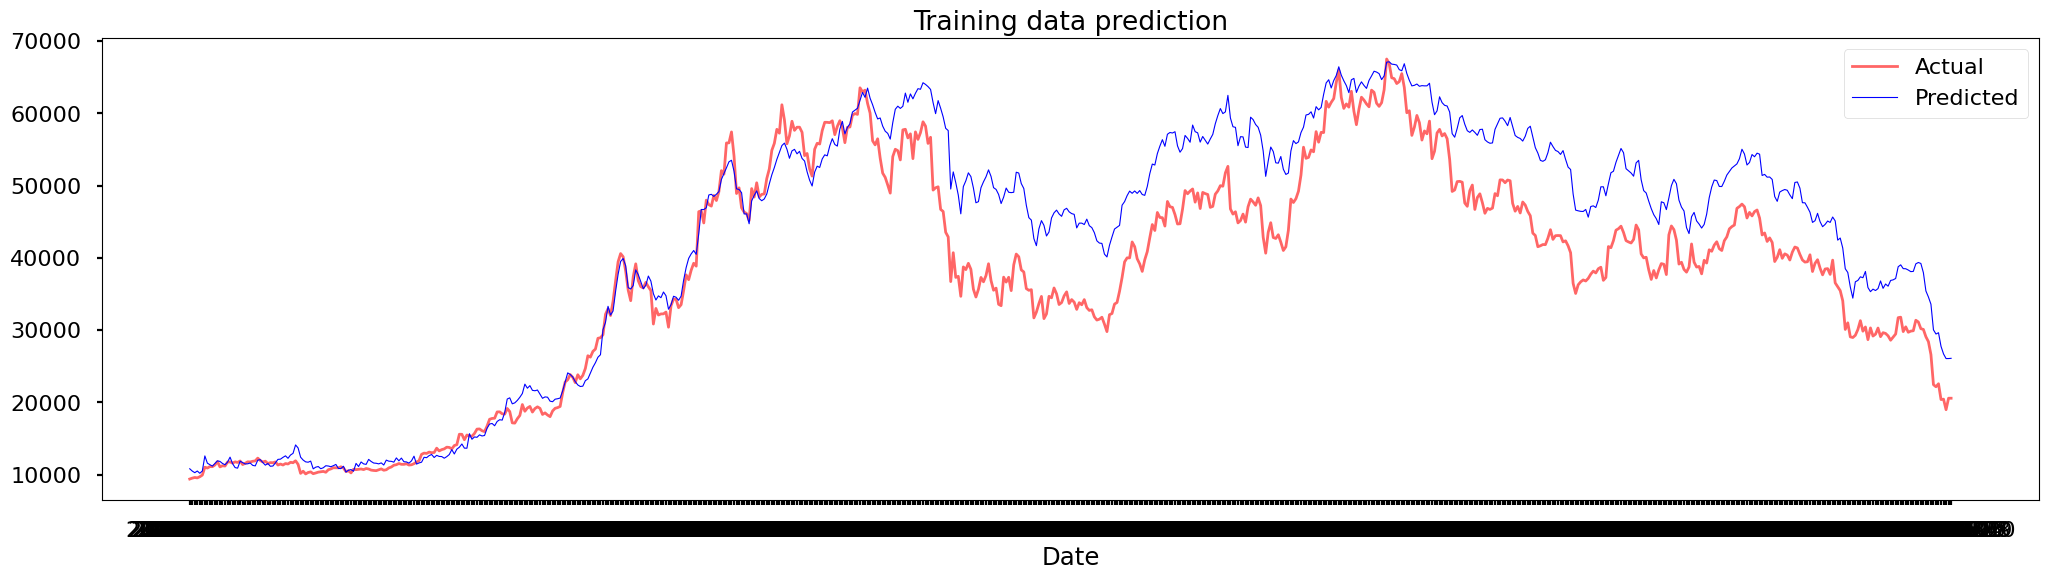

In [239]:
plt.figure(figsize=(25,6))
plt.plot(df[:700]['Date'], y_train_df, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(df[:700]['Date'], y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.title("Training data prediction")
plt.show()

In [240]:
y_val_pred = scaler.inverse_transform(model.predict(X_val_df).reshape(-1,1))
y_val_pred[:10]

array([[27376.0118233 ],
       [26417.69064192],
       [26659.70540802],
       [28279.28373914],
       [28493.78134102],
       [28315.39773636],
       [28409.21441091],
       [27793.75415538],
       [27474.24489608],
       [26898.27157129]])

In [43]:
y_val_df=scaler.inverse_transform(y_val_df.reshape(-1,1))
y_val_df[0:10]

array([[10179.3],
       [10721.7],
       [10897.1],
       [11046.4],
       [11809.9],
       [13063.8],
       [11287.8],
       [12409.1],
       [11906.5],
       [10818.6]])

In [44]:
y_val_df = y_val_df.ravel()
y_val_pred = y_val_pred.ravel()

In [ ]:

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

print('MAPE for testing data: ', mape(y_val_pred, y_val_df)*100, '%')

MAPE for testing data:  22.327476355323558 %


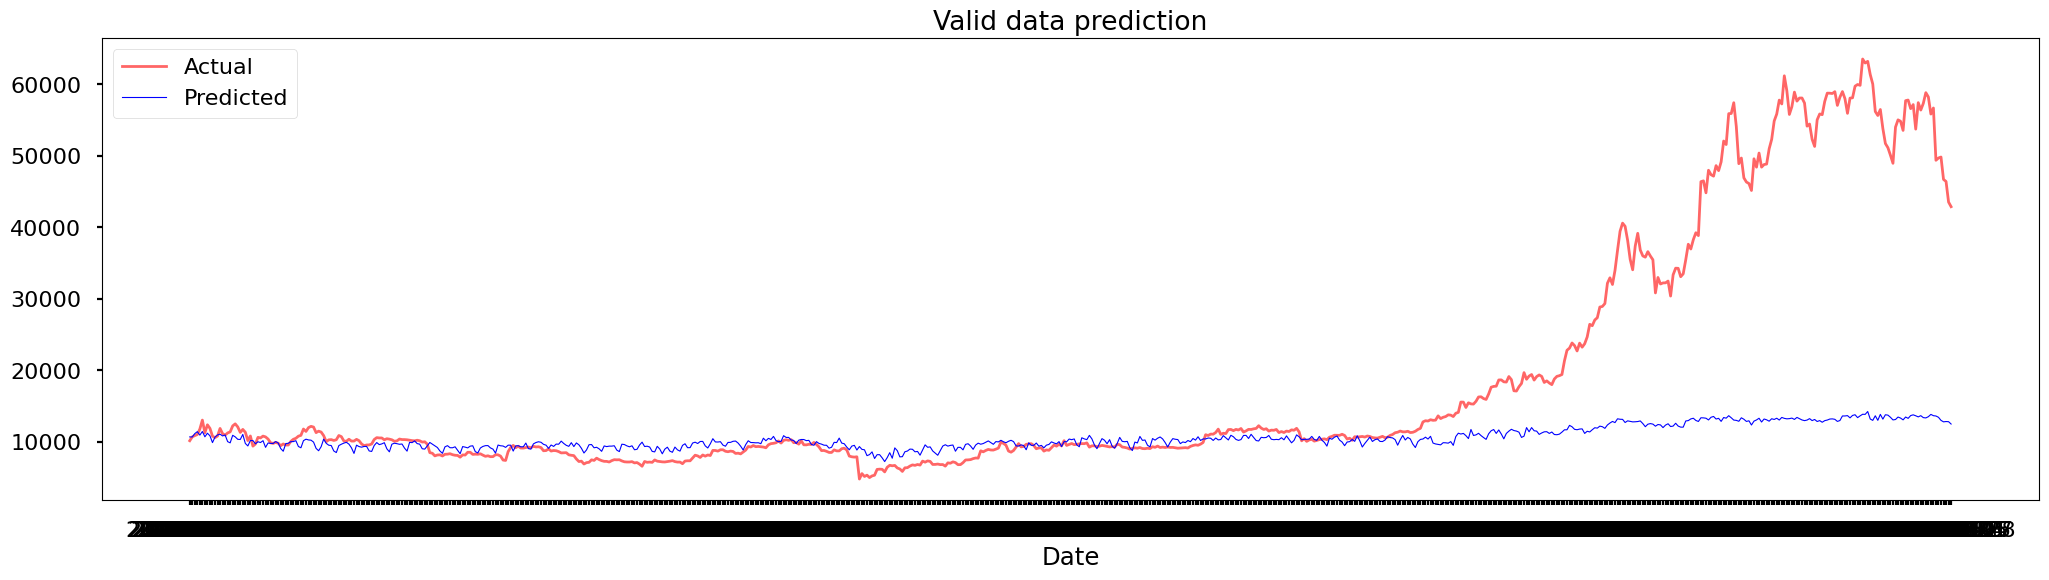

In [46]:
plt.figure(figsize=(25,6))
plt.plot(df[3257:3955]['Date'], y_val_df, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(df[3257:3955]['Date'], y_val_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.title("Valid data prediction")
plt.show()

In [241]:
y_test_pred = scaler.inverse_transform(model.predict(X_test_df).reshape(-1,1))
y_test_pred[:10]

array([[29339.05614312],
       [29702.61297758],
       [29206.9846197 ],
       [28547.66377341],
       [29505.97002052],
       [30122.37633975],
       [30387.67082133],
       [30375.28229609],
       [30334.09742305],
       [30578.82031865]])

In [242]:
y_test_df=scaler.inverse_transform(y_test_df.reshape(-1,1))
y_test_df[0:10]

array([[16638.3],
       [16699.2],
       [16286.7],
       [15776.2],
       [16212.9],
       [16623.9],
       [16601.2],
       [16512.3],
       [16456.5],
       [16425.6]])

In [243]:
y_test_df = y_test_df.ravel()
y_test_pred = y_test_pred.ravel()

In [244]:

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

print('MAPE for testing data: ', mape(y_test_pred, y_test_df)*100, '%')


MAPE for testing data:  36.089112325592346 %


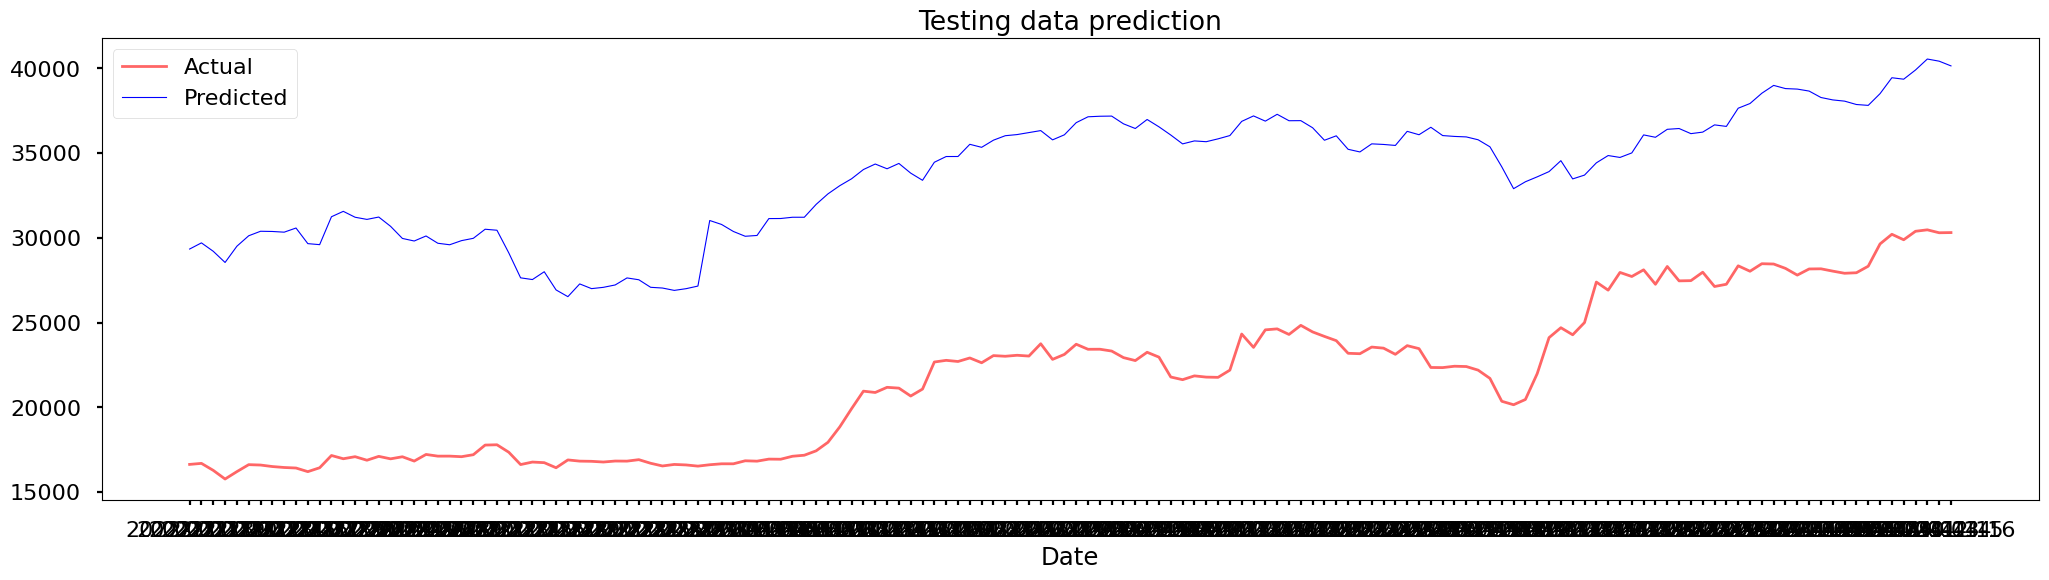

In [245]:
plt.figure(figsize=(25,6))
plt.plot(df[850:1000]['Date'], y_test_df, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(df[850:1000]['Date'], y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.title("Testing data prediction")
plt.show()